In [102]:
# Probability of an event is the likelihood that the event will occur

# Random Variables

In [5]:
import numpy as np

die_6 = range(1, 7)
num_rolls = 2

# choice( list of numbers, values to choose, keep/discard value form list )
print(np.random.choice(die_6, num_rolls, replace=True))

[3 1]


In [13]:
die_12 = range(1, 13)

print(np.random.choice( die_12, 6, replace=False ))

[ 3 12 10 11  1  9]


In [14]:
# Discrete Random Variable : countable number of possible values
# Continous Random Variable : uncountable number of possible values

# Binomial Distribution Function

In [ ]:
# Bi = 2, means it will have two possible outcomes either True or False 

In [100]:
# Formula
# P(X=k)=( n ) . p**k . (1−p)**n−k
#        ( k )

In [101]:
# Flip a coin 10 times and what is the probability that head will occur 6 times?
# Binomial Probability Mass Function : probability of observing particular value of a discrete eandom variable

import scipy.stats as st

n = 10
x = 6
bi = 1/2

probability = st.binom.pmf(x , n , bi )
result = probability * 100

tail = 1 - probability
tail_prob = tail * 100

print(f"Probability of Head is {result:.3f} %")
print(f"Probability of Tail is {tail_prob:.3f} %")

Probability of Head is 20.508 %
Probability of Tail is 79.492 %


In [53]:
from matplotlib import pyplot as plt
import ipywidgets as widgets
import scipy.stats as st

@widgets.interact(x=widgets.IntSlider(min=1, max=10, step=1, value=10))
def plot_prob(x):
    prob = []
    for i in range(0, 11):
        prob.append(st.binom.pmf(i, x, 0.5))

    plt.figure(figsize=(6, 3))
    plt.bar(range(0, 11), prob, color='brown')
    plt.xlabel('Number of Heads')
    plt.ylabel('Probability')
    plt.grid(color='r')
    plt.xticks(range(0, 11))
    plt.show()


interactive(children=(IntSlider(value=10, description='x', max=10, min=1), Output()), _dom_classes=('widget-in…

# Probability over a Range

In [55]:
# Flip a coin and wnat the probability of getting 1 and 3 heads.
# probability of 1 + probability of 2 + probability of 3

import scipy.stats as stats

prob = stats.binom.pmf(1, 5, 0.5) + stats.binom.pmf(2, 5, 0.5) + stats.binom.pmf(3, 5, 0.5)
print(prob)

0.7812499999999996


In [57]:
# OR

prob2 = []

for i in range(1, 4):
    prob2.append(stats.binom.pmf(i, 5, 0.5))

print(prob2)
print(sum(prob2))

[0.15624999999999997, 0.3124999999999998, 0.3124999999999998]
0.7812499999999996


In [ ]:
# want to know the probaility of observing 8 or fewer heads from 10 coin flips.

In [69]:
prob3 = []
prob4 = []

for i in range(0, 9):
    prob3.append(stats.binom.pmf(i, 10, 0.5))

perc_08 = sum(prob3)

print("Probability of 0 to 8: {:.2f}%".format(perc_08 * 100))

# To check do for 9 and 10
for i in range(9, 11):
    prob4.append(stats.binom.pmf(i, 10, 0.5))

perc_910 = sum(prob4)
print("Probability of 9 to 10: {:.2f}%".format(perc_910 * 100))

print("Adding both will give 1: ", perc_08 + perc_910)

Probability of 0 to 8: 98.93%
Probability of 9 to 10: 1.07%
Adding both will give 1:  0.9999999999999998


In [83]:
from matplotlib import pyplot as plt
import ipywidgets as widget

@widget.interact(x=widget.IntRangeSlider(value=[1, 3], min=0, max=10, description='Heads'))

def plot_prob(x):
    prob_1 = []
    prob_2 = [] # probability in range
    for i in range(0, 11):
        prob_1.append(stats.binom.pmf(i, 10, 0.5))

    for i in range(x[0], x[1]+1 ):
        prob_2.append(stats.binom.pmf(i, 10, 0.5))

    print("Probability of between {} and {} heads is: {} %".format(x[0], x[1], round(sum(prob_2)*100, 2)))
    print()
    plt.figure(figsize=(6, 3))
    plt.bar(range(0, 11), prob_1, color="#2f4f4f")
    plt.bar(range(x[0], x[1]+1), prob_2, color="green")
    
    plt.xlabel("Number of Heads")
    plt.ylabel("Probability")
    plt.title("Binomial Distribution: Probability over a Range")
    plt.show()



interactive(children=(IntRangeSlider(value=(1, 3), description='Heads', max=10), Output()), _dom_classes=('wid…

# Cumulative Distribution Function

In [ ]:
# instead of probability of observing a specific value, the cumulative distribution function gives the
# probability of observing a specific value or less

In [99]:
# Formula
# P(X≤k)=P(X=0)+P(X=1)+⋯+P(X=k)

In [90]:
# Calculate the probability of observing 3 or fewer heads, from flipping 10 fair coins

import scipy.stats as stats

probability1 = stats.binom.cdf(3, 10, 0.5)
print("Using CDF: ", probability1)

# compared to PMF
proob = []
for i in range(0, 4):
    proob.append(stats.binom.pmf(i, 10, 0.5))

print("Using PMF: ", sum(proob))

print("Both gives same results but CDF is short and better for checking prob of that num and below it")

Using CDF:  0.171875
Using PMF:  0.17187500000000003
Both gives same results but CDF is short and better for checking prob of that num and below it


In [91]:
# P(4 to 8) = P(0 to 8) - P(0 to 3)

prob2 = stats.binom.cdf(8, 10, 0.5) - stats.binom.cdf(3, 10, 0.5)
print("Probability from 4 to 8 Heads: ", prob2)

Probability from 4 to 8 Heads:  0.8173828125


In [93]:
# P(more than 6) = 1 - P(0 to 6)

prob3 = 1 - stats.binom.cdf(6, 10, 0.5)
print("Probability for more than 6 Heads: ", prob3)

Probability for more than 6 Heads:  0.171875


# Probability Density Function

In [94]:
# define the probability of continous random value and span across all possible values that the given random variable can take on

prob = stats.norm.cdf(158, 167.4, 8)
print(prob)

0.11999735789901239


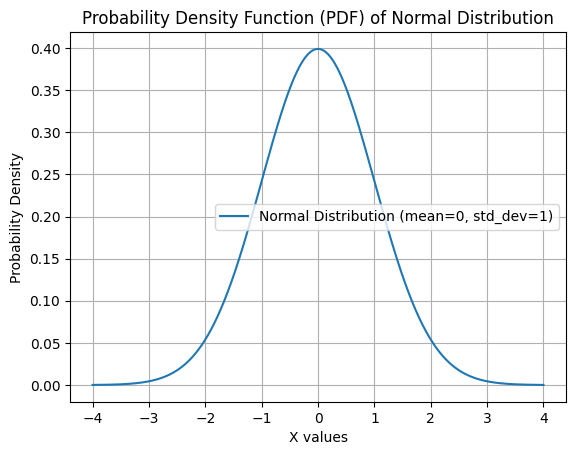

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

mean = 0   # Mean (center of the distribution)
std_dev = 1  # Standard deviation (controls the width of the curve)

# Generate an array of values between -4 and 4 (common range for normal distribution)
x = np.linspace(-4, 4, 1000)

# Compute the PDF values for each x using the normal distribution's PDF function
pdf_values = norm.pdf(x, mean, std_dev)

# Plot the PDF
plt.plot(x, pdf_values, label="Normal Distribution (mean=0, std_dev=1)")
plt.title("Probability Density Function (PDF) of Normal Distribution")
plt.xlabel("X values")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()


In [96]:
# Example: mean= 20 degree and std of 3 degree, probabaility of weather btw 18 to 25 degree

prob2 = stats.norm.cdf(25, 20, 3) - stats.norm.cdf(18, 20, 3)
print(prob2)

# The CDF tells us the probability that the temperature is less than or equal to 25°C. MINUS
# It gives the probability that the temperature is less than or equal to 18°C.

0.6997171101802624


In [97]:
# from example one, calculate the probability of random selected day will be greater than 24 degree

prob3 = 1 - stats.norm.cdf(24, 20, 3)
print(prob3)

0.09121121972586788
